In [36]:
!unzip iriscsv.zip

Archive:  iriscsv.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

import pickle
import requests

In [38]:
# Import data
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


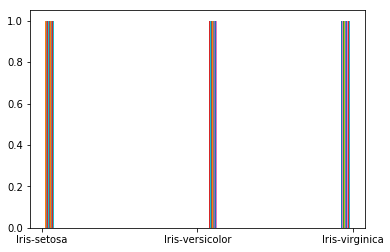

In [39]:
# Check the distribution of the target var
plt.hist(iris['Species'])
plt.show()

In [40]:
# Encode
le = LabelEncoder()
le.fit(iris['Species'])

iris['Species'] = le.transform(iris['Species'])

In [58]:
# Pickle class key
class_key = le.classes_
pickle.dump(class_key, open('class_key.pkl', 'wb'))

In [64]:
class_key[0]

'Iris-setosa'

In [41]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [42]:
# features
X = iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# target
y = iris.iloc[:,5]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [45]:
# Instantiate model
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [46]:
# predictions
y_pred = model.predict(X_test)

In [55]:
# pickle the accuracy score
accuracy = accuracy_score(y_test, y_pred)
pickle.dump(accuracy, open('iris_model_accuracy.pkl', 'wb'))

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [49]:
# pickle the model
pickle.dump(model, open('iris_model.pkl', 'wb'))

In [70]:
url = "http://127.0.0.1:5000/api"

In [71]:
import json
data = json.dumps({'SepalLengthCm': 5.9, 'SepalWidthCm': 3.5, 'PetalLengthCm': 5.1, 'PetalWidthCm': 1.8})

In [72]:
print(data)

{"SepalLengthCm": 5.9, "SepalWidthCm": 3.5, "PetalLengthCm": 5.1, "PetalWidthCm": 1.8}


In [1]:
send = requests.post(url, data).json

NameError: name 'requests' is not defined

In [74]:
print(send.json())

{'results': {'Prediction': 2}}
